### Topic Suggestion 
1. Fraud Detection in Financial Transactions: A Machine Learning Approach
2. Identifying Fraudulent Transactions: Predictive Modeling
3. Building an Intelligent Fraud Detection System
4. Data-Driven Approach for Transaction Anomaly Detection

## Project Preview
---

According to INTERPOL's (2024) assessment, regions such as West and Southern Africa have seen an increase in romance baiting frauds, while Asia has become a focal point for telecommunication frauds where perpetrators impersonate law enforcement or bank officials to extract financial information from victims.Among financial institutions, commercial banks and health insurers have been notably affected by fraud. Additionally, identity fraud has emerged as a predominant threat, accounting for 45% of all adverse contributions reported by banks and financial service providers in 2023, with projections suggesting it could reach 50% by the end of the year,(Retain Banker International, 2024). Interpol (2024) states that causes of fraud in commercial banks and financial institutions are multifaceted. The increased use of technology has enabled organized crime groups to conduct sophisticated fraud campaigns at relatively low costs. Moreover, PYMNTS (2024) indicates the rise in scam-related frauds, particularly those exploiting consumer trust through social engineering, has led to a 56% increase in such incidents in 2024, surpassing traditional digital payment crimes. Regarding transaction methods, scams have become the leading form of fraud, surpassing digital payment fraud. The share of scam-related fraud increased by 56% in 2024, with financial losses from scams rising by 121%. These scams now account for 23% of all fraudulent transactions, with relationship and product scams responsible for most losses,(PYMNTS,2024). 

In Kenya, financial fraud has become an escalating concern, with recent incidents highlighting the vulnerability of the nation's financial institutions,(Kenay Wall Street,2024). A notable case involves Kiwipay Kenya Limited, where approximately Ksh2.3 billion ($19.48 million) was frozen due to suspicions of debit card fraud linked to an international syndicate. The CBK (2025) has identified several factors contributing to the rise of fraud within the country's financial sector. These include the increased adoption of information and communication technology (ICT), which, while enhancing operational efficiency, has also opened new avenues for cybercriminals. Additionally, a general lack of awareness regarding financial security among consumers has made them more susceptible to schemes such as social engineering and identity theft. Emerging cyber threats further exacerbate these challenges, necessitating robust cybersecurity measures across financial institutions. Among the various transaction methods, digital payment platforms have been significantly targeted by fraudsters. The CBK has observed that mobile and internet banking channels are particularly vulnerable, with fraudsters exploiting these platforms to conduct unauthorized transactions. This trend underscores the need for enhanced security protocols and increased consumer education to mitigate the risks associated with digital financial services.

## **Problem Statement**
---
The Central Bank of Kenya (CBK) has highlighted key risk factors, including the rapid adoption of digital financial services, low consumer awareness of financial security, and emerging cyber threats that continue to evolve. Furthermore, scam-related frauds, identity theft, and social engineering tactics have intensified, leading to substantial financial losses and undermining public trust in the financial sector. In response to these challenges, we aim to develop a robust fraud detection and prevention model that leverages advanced technologies such as machine learning, artificial intelligence, and real-time transaction monitoring. This model will enhance the ability of financial institutions to detect fraudulent activities proactively, mitigate risks, and strengthen cybersecurity measures. 

## **Objectives**
---



## **Data Source and description**

The data was sourced from https://www.kaggle.com/datasets/marusagar/bank-transaction-fraud-detection

The dataset used for model building contained 200000 observations of 24 variables.

Here are the information of the columns:

* Customer_ID: A particular identifier for every customer within the bank's system.

* Customer_Name: The name of the consumer making the transaction.

* Gender: The gender of the consumer (e.G., Male, Female, Other).

* Age: The age of the consumer at the time of the transaction.

* State: The nation in which the patron resides.

* City: The metropolis wherein the client is living.

* Bank_Branch: The specific financial institution branch wherein the consumer holds their account.

* Account_Type: The kind of account held with the aid of the customer (e.G., Savings, Checking).

* Transaction_ID: A particular identifier for each transaction.

* Transaction_Date: The date on which the transaction passed off.

* Transaction_Time: The specific time the transaction became initiated.

* Transaction_Amount: The financial value of the transaction.

* Merchant_ID: A particular identifier for the merchant worried within the transaction.

* Transaction_Type: The nature of the transaction (e.G., Withdrawal, Deposit, Transfer).

* Merchant_Category: The class of the merchant (e.G., Retail, Online, Travel).

* Account_Balance: The balance of the customer's account after the transaction.

* Transaction_Device: The tool utilized by the consumer to perform the transaction (e.G., Mobile, Desktop).

* Transaction_Location: The geographical vicinity (e.G., latitude, longitude) of the transaction.

* Device_Type: The kind of device used for the transaction (e.G., Smartphone, Laptop).

* Is_Fraud: A binary indicator (1 or zero) indicating whether or not the transaction is fraudulent or now not.

* Transaction_Currency: The currency used for the transaction (e.G., USD, EUR).

* Customer_Contact: The contact variety of the client.

* Transaction_Description: A brief description of the transaction (e.G., buy, switch).

* Customer_Email: The e-mail cope with related to the consumer's account.**


## Import the packages

In [ ]:
# This code will load the dataset from the provided zip file and perform initial data understanding.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style(style='whitegrid')
import zipfile
import os
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.decomposition import PCA,TruncatedSVD
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, RocCurveDisplay


!pip install xgboost
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.metrics import classification_report

!pip install lightgbm
import lightgbm as lgb

In [203]:
!pip install xgboost
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.metrics import classification_report

!pip install lightgbm
import lightgbm as lgb

## Data Loading 

In [107]:
# Path the zip file
zip_file_path = 'data/archive.zip'
extracted_files_path = 'data'

# Checking existence of the output directory
os.makedirs(extracted_files_path, exist_ok=True)

# Unzipping the archive file
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extracted_files_path)

print(f"Files extracted to {extracted_files_path}")

Files extracted to data


In [154]:

# Loading dataset to into dataframes
df= pd.read_csv('data/Bank_Transaction_Fraud_Detection.csv')

# Display the first five rows of the dataframe
df.head()

,Customer_ID,Customer_Name,Gender,Age,State,City,Bank_Branch,Account_Type,Transaction_ID,Transaction_Date,...,Merchant_Category,Account_Balance,Transaction_Device,Transaction_Location,Device_Type,Is_Fraud,Transaction_Currency,Customer_Contact,Transaction_Description,Customer_Email
0,d5f6ec07-d69e-4f47-b9b4-7c58ff17c19e,Osha Tella,Male,60,Kerala,Thiruvananthapuram,Thiruvananthapuram Branch,Savings,4fa3208f-9e23-42dc-b330-844829d0c12c,23-01-2025,...,Restaurant,74557.27,Voice Assistant,"Thiruvananthapuram, Kerala",POS,0,INR,+9198579XXXXXX,Bitcoin transaction,oshaXXXXX@XXXXX.com
1,7c14ad51-781a-4db9-b7bd-67439c175262,Hredhaan Khosla,Female,51,Maharashtra,Nashik,Nashik Branch,Business,c9de0c06-2c4c-40a9-97ed-3c7b8f97c79c,11-01-2025,...,Restaurant,74622.66,POS Mobile Device,"Nashik, Maharashtra",Desktop,0,INR,+9191074XXXXXX,Grocery delivery,hredhaanXXXX@XXXXXX.com
2,3a73a0e5-d4da-45aa-85f3-528413900a35,Ekani Nazareth,Male,20,Bihar,Bhagalpur,Bhagalpur Branch,Savings,e41c55f9-c016-4ff3-872b-cae72467c75c,25-01-2025,...,Groceries,66817.99,ATM,"Bhagalpur, Bihar",Desktop,0,INR,+9197745XXXXXX,Mutual fund investment,ekaniXXX@XXXXXX.com
3,7902f4ef-9050-4a79-857d-9c2ea3181940,Yamini Ramachandran,Female,57,Tamil Nadu,Chennai,Chennai Branch,Business,7f7ee11b-ff2c-45a3-802a-49bc47c02ecb,19-01-2025,...,Entertainment,58177.08,POS Mobile App,"Chennai, Tamil Nadu",Mobile,0,INR,+9195889XXXXXX,Food delivery,yaminiXXXXX@XXXXXXX.com
4,3a4bba70-d9a9-4c5f-8b92-1735fd8c19e9,Kritika Rege,Female,43,Punjab,Amritsar,Amritsar Branch,Savings,f8e6ac6f-81a1-4985-bf12-f60967d852ef,30-01-2025,...,Entertainment,16108.56,Virtual Card,"Amritsar, Punjab",Mobile,0,INR,+9195316XXXXXX,Debt repayment,kritikaXXXX@XXXXXX.com


## Data Familiarization

In [109]:
# Checking the shape of the dataframe
print(f"The dataset has {df.shape[0]} rows and {df.shape[1]} columns")

The dataset has 200000 rows and 24 columns


In [110]:
# Checking for the column names
df.columns

Index(['Customer_ID', 'Customer_Name', 'Gender', 'Age', 'State', 'City',
       'Bank_Branch', 'Account_Type', 'Transaction_ID', 'Transaction_Date',
       'Transaction_Time', 'Transaction_Amount', 'Merchant_ID',
       'Transaction_Type', 'Merchant_Category', 'Account_Balance',
       'Transaction_Device', 'Transaction_Location', 'Device_Type', 'Is_Fraud',
       'Transaction_Currency', 'Customer_Contact', 'Transaction_Description',
       'Customer_Email'],
      dtype='object')

In [112]:
# Extracting information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 24 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   Customer_ID              200000 non-null  object 
 1   Customer_Name            200000 non-null  object 
 2   Gender                   200000 non-null  object 
 3   Age                      200000 non-null  int64  
 4   State                    200000 non-null  object 
 5   City                     200000 non-null  object 
 6   Bank_Branch              200000 non-null  object 
 7   Account_Type             200000 non-null  object 
 8   Transaction_ID           200000 non-null  object 
 9   Transaction_Date         200000 non-null  object 
 10  Transaction_Time         200000 non-null  object 
 11  Transaction_Amount       200000 non-null  float64
 12  Merchant_ID              200000 non-null  object 
 13  Transaction_Type         200000 non-null  object 
 14  Merc

In [113]:
# Checking for unique values per column
df.nunique()

Customer_ID                200000
Customer_Name              142699
Gender                          2
Age                            53
State                          34
City                          145
Bank_Branch                   145
Account_Type                    3
Transaction_ID             200000
Transaction_Date               31
Transaction_Time            77856
Transaction_Amount         197978
Merchant_ID                200000
Transaction_Type                5
Merchant_Category               6
Account_Balance            197954
Transaction_Device             20
Transaction_Location          148
Device_Type                     4
Is_Fraud                        2
Transaction_Currency            1
Customer_Contact             9000
Transaction_Description       172
Customer_Email               4779
dtype: int64

## Data Cleaning 

In [114]:
# df= df.drop(["Customer_ID", "Customer_Name", "City", "Bank_Branch", "Transaction_ID", "Merchant_ID", "Transaction_Location", "Transaction_Currency", "Customer_Contact"], axis =1)
# df.head()

In [115]:
# Check for duplicate rows
duplicates = df[df.duplicated()]
print("Duplicate Rows:")
duplicates.info()

Duplicate Rows:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 0 entries
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Customer_ID              0 non-null      object 
 1   Customer_Name            0 non-null      object 
 2   Gender                   0 non-null      object 
 3   Age                      0 non-null      int64  
 4   State                    0 non-null      object 
 5   City                     0 non-null      object 
 6   Bank_Branch              0 non-null      object 
 7   Account_Type             0 non-null      object 
 8   Transaction_ID           0 non-null      object 
 9   Transaction_Date         0 non-null      object 
 10  Transaction_Time         0 non-null      object 
 11  Transaction_Amount       0 non-null      float64
 12  Merchant_ID              0 non-null      object 
 13  Transaction_Type         0 non-null      object 
 14  Merchant_Category     

In [116]:
# Select numerical columns
numerical_cols = ['Age', 'Transaction_Amount', 'Account_Balance', 'Is_Fraud']

# Detect outliers using IQR
for col in numerical_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    print(f"Outliers in {col}: {outliers.shape[0]}")

Outliers in Age: 0
Outliers in Transaction_Amount: 0
Outliers in Account_Balance: 0
Outliers in Is_Fraud: 10088


In [117]:
# Select numerical columns
numerical_cols = ['Age', 'Transaction_Amount', 'Account_Balance']

# Function to remove outliers using IQR
def remove_outliers_iqr(df, columns):
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
    return df

# Remove outliers
df_cleaned = remove_outliers_iqr(df, numerical_cols)

# Save the cleaned dataset (optional)
df_cleaned.to_csv("cleaned_dataset.csv", index=False)

# Print before and after removing outliers
print(f"Original dataset shape: {df.shape}")
print(f"Cleaned dataset shape: {df_cleaned.shape}")


Original dataset shape: (200000, 24)
Cleaned dataset shape: (200000, 24)


## EDA ANalysis

In [119]:
# Get summary statistics 
df.describe()

,Age,Transaction_Amount,Account_Balance,Is_Fraud
count,200000.000000,200000.000000,200000.000000,200000.000000
mean,44.015110,49538.015554,52437.988784,0.050440
std,15.288774,28551.874004,27399.507128,0.218852
min,18.000000,10.290000,5000.820000,0.000000
25%,31.000000,24851.345000,28742.395000,0.000000
50%,44.000000,49502.440000,52372.555000,0.000000
75%,57.000000,74314.625000,76147.670000,0.000000
max,70.000000,98999.980000,99999.950000,1.000000


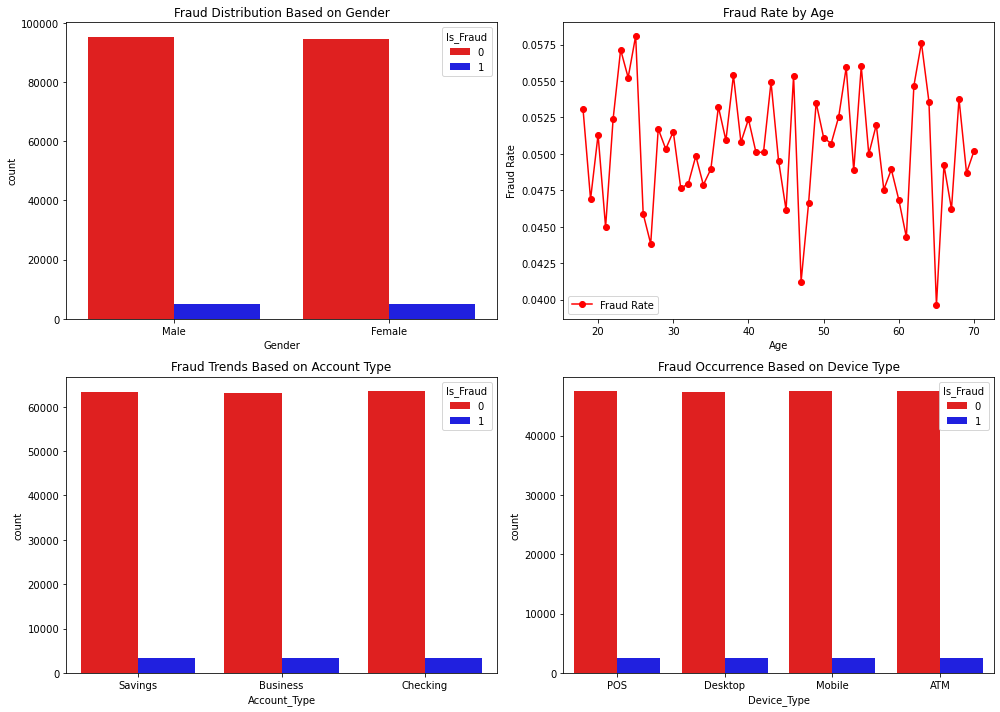

In [122]:
# Create subplots (2 rows, 2 columns)
fig, axes = plt.subplots(2, 2, figsize=(14, 10))  
axes = axes.flatten() 

# 1. Gender vs. Is_Fraud (Countplot)
sns.countplot(ax=axes[0], x='Gender', hue='Is_Fraud', data=df, palette=['#FF0000', '#0000FF'])
axes[0].set_title('Fraud Distribution Based on Gender')

# 2. Age vs. Is_Fraud (Line Graph)
age_fraud_counts = df.groupby('Age')['Is_Fraud'].sum()  # Sum of fraud cases per age
age_total_counts = df['Age'].value_counts().sort_index()  # Total transactions per age
fraud_rate = age_fraud_counts / age_total_counts  # Fraud rate per age

axes[1].plot(fraud_rate.index, fraud_rate.values, marker='o', linestyle='-', color='red', label='Fraud Rate')
axes[1].set_title('Fraud Rate by Age')
axes[1].set_xlabel('Age')
axes[1].set_ylabel('Fraud Rate')
axes[1].legend()

# 3. Account Type vs. Is_Fraud (Countplot)
sns.countplot(ax=axes[2], x='Account_Type', hue='Is_Fraud', data=df, palette=['#FF0000', '#0000FF'])
axes[2].set_title('Fraud Trends Based on Account Type')

# 4. Device Type vs. Is_Fraud (Countplot)
sns.countplot(ax=axes[3], x='Device_Type', hue='Is_Fraud', data=df, palette=['#FF0000', '#0000FF'])
axes[3].set_title('Fraud Occurrence Based on Device Type')

# Adjust layout
plt.tight_layout()
plt.show()


In [92]:

# 1. Gender vs. Is_Fraud Summary Table
gender_summary = df.groupby('Gender')['Is_Fraud'].value_counts().unstack().fillna(0)
print("\n### Fraud Distribution by Gender ###\n", gender_summary)

# # 2. Age vs. Is_Fraud Summary Table
# age_fraud_counts = df.groupby('Age')['Is_Fraud'].sum()  # Total fraud cases per age
# age_total_counts = df['Age'].value_counts().sort_index()  # Total transactions per age
# fraud_rate = age_fraud_counts / age_total_counts  # Fraud rate per age

# age_summary = pd.DataFrame({
#     'Total_Transactions': age_total_counts,
#     'Fraud_Cases': age_fraud_counts,
#     'Fraud_Rate': fraud_rate
# }).fillna(0).reset_index().rename(columns={'index': 'Age'})

# print("\n### Fraud Rate by Age ###\n", age_summary.head(10))  # Print first 10 rows

# # 3. Account Type vs. Is_Fraud Summary Table
# account_summary = df.groupby('Account_Type')['Is_Fraud'].value_counts().unstack().fillna(0)
# print("\n### Fraud Trends by Account Type ###\n", account_summary)

# # 4. Device Type vs. Is_Fraud Summary Table
# device_summary = df.groupby('Device_Type')['Is_Fraud'].value_counts().unstack().fillna(0)
# print("\n### Fraud Occurrence by Device Type ###\n", device_summary)



### Fraud Distribution by Gender ###
 Is_Fraud      0     1
Gender               
Female    94541  5007
Male      95371  5081


In [123]:
# Group by Customer_Email to count total transactions and fraud cases
email_fraud_analysis = df.groupby("Customer_Email")["Is_Fraud"].agg(["count", "sum"])
email_fraud_analysis.rename(columns={"count": "Total_Transactions", "sum": "Fraud_Cases"}, inplace=True)

# Calculate fraud rate for each email
email_fraud_analysis["Fraud_Rate"] = email_fraud_analysis["Fraud_Cases"] / email_fraud_analysis["Total_Transactions"]

# Sort by fraud rate
email_fraud_analysis_sorted = email_fraud_analysis.sort_values(by="Fraud_Rate", ascending=False)

# Get strongest (most fraudulent) and weakest (least fraudulent) emails
strongest_email = email_fraud_analysis_sorted.iloc[0]
weakest_email = email_fraud_analysis_sorted.iloc[-1]

# Display results
print("\n### Strongest Email (Most Fraudulent) ###\n", strongest_email)
print("\n### Weakest Email (Least Fraudulent) ###\n", weakest_email)


### Strongest Email (Most Fraudulent) ###
 Total_Transactions    43.000000
Fraud_Cases           10.000000
Fraud_Rate             0.232558
Name: eiravatiXXX@XXXXX.com, dtype: float64

### Weakest Email (Least Fraudulent) ###
 Total_Transactions    49.0
Fraud_Cases            0.0
Fraud_Rate             0.0
Name: ekantikaXXX@XXXXXXX.com, dtype: float64


In [124]:
# Save the analysis results to a CSV for reference
email_fraud_analysis_sorted.to_csv("email_fraud_analysis.csv", index=True)


# Filter emails with at least 5 transactions (to avoid misleading results from very few transactions)
email_fraud_analysis_filtered = email_fraud_analysis[email_fraud_analysis["Total_Transactions"] >= 5]

# Get top 10 strongest (most fraudulent) and weakest (least fraudulent) emails
top_strongest_emails = email_fraud_analysis_sorted.head(10)
top_weakest_emails = email_fraud_analysis_sorted.tail(10)

# Display results
print("\n### Top 10 Strongest Emails (Most Fraudulent) ###\n", top_strongest_emails)
print("\n### Top 10 Weakest Emails (Least Fraudulent) ###\n", top_weakest_emails)



### Top 10 Strongest Emails (Most Fraudulent) ###
                          Total_Transactions  Fraud_Cases  Fraud_Rate
Customer_Email                                                      
eiravatiXXX@XXXXX.com                    43           10    0.232558
jeremiahXXX@XXXXX.com                    36            8    0.222222
jagratiXXXX@XXXXX.com                    34            7    0.205882
mayaXXXXX@XXXXXXX.com                    39            8    0.205128
hariniXXX@XXXXXX.com                     40            8    0.200000
keyaXXX@XXXXX.com                        45            9    0.200000
manyaXXX@XXXXXX.com                      30            6    0.200000
ekalingaXXX@XXXXXXX.com                  37            7    0.189189
nirjaXXXX@XXXXXXX.com                    37            7    0.189189
ridhiXXX@XXXXXX.com                      43            8    0.186047

### Top 10 Weakest Emails (Least Fraudulent) ###
                          Total_Transactions  Fraud_Cases  Fraud_Rate


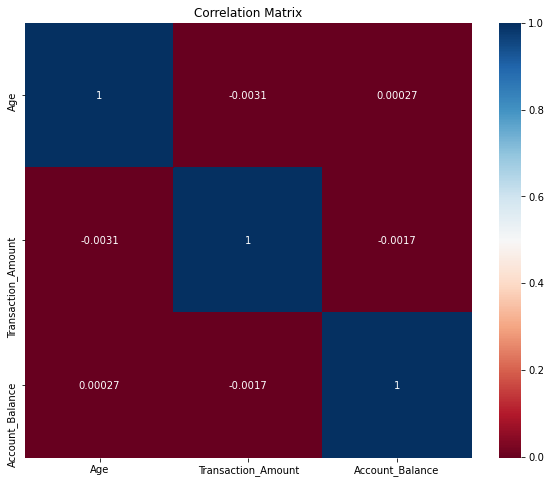

In [125]:
#Correlation for the numeric columns
corr_matrix = df_cleaned[numerical_cols].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='RdBu')
plt.title('Correlation Matrix')
plt.show()

## Data Preprosessing 

### One hot encoding 

In [148]:
# ENCODE CATEGORICAL VARIABLES
categorical_cols = ['Gender', 'Account_Type', 'Transaction_Type', 'Merchant_Category', 'Transaction_Device', 'Device_Type']

label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le  # Store encoder for later use

df.head()

,Customer_ID,Customer_Name,Gender,Age,State,City,Bank_Branch,Account_Type,Transaction_ID,Transaction_Date,...,Merchant_Category,Account_Balance,Transaction_Device,Transaction_Location,Device_Type,Is_Fraud,Transaction_Currency,Customer_Contact,Transaction_Description,Customer_Email
0,d5f6ec07-d69e-4f47-b9b4-7c58ff17c19e,Osha Tella,1,60,Kerala,Thiruvananthapuram,Thiruvananthapuram Branch,2,4fa3208f-9e23-42dc-b330-844829d0c12c,23-01-2025,...,5,74557.27,17,"Thiruvananthapuram, Kerala",3,0,INR,+9198579XXXXXX,Bitcoin transaction,oshaXXXXX@XXXXX.com
1,7c14ad51-781a-4db9-b7bd-67439c175262,Hredhaan Khosla,0,51,Maharashtra,Nashik,Nashik Branch,0,c9de0c06-2c4c-40a9-97ed-3c7b8f97c79c,11-01-2025,...,5,74622.66,9,"Nashik, Maharashtra",1,0,INR,+9191074XXXXXX,Grocery delivery,hredhaanXXXX@XXXXXX.com
2,3a73a0e5-d4da-45aa-85f3-528413900a35,Ekani Nazareth,1,20,Bihar,Bhagalpur,Bhagalpur Branch,2,e41c55f9-c016-4ff3-872b-cae72467c75c,25-01-2025,...,3,66817.99,0,"Bhagalpur, Bihar",1,0,INR,+9197745XXXXXX,Mutual fund investment,ekaniXXX@XXXXXX.com
3,7902f4ef-9050-4a79-857d-9c2ea3181940,Yamini Ramachandran,0,57,Tamil Nadu,Chennai,Chennai Branch,0,7f7ee11b-ff2c-45a3-802a-49bc47c02ecb,19-01-2025,...,2,58177.08,8,"Chennai, Tamil Nadu",2,0,INR,+9195889XXXXXX,Food delivery,yaminiXXXXX@XXXXXXX.com
4,3a4bba70-d9a9-4c5f-8b92-1735fd8c19e9,Kritika Rege,0,43,Punjab,Amritsar,Amritsar Branch,2,f8e6ac6f-81a1-4985-bf12-f60967d852ef,30-01-2025,...,2,16108.56,16,"Amritsar, Punjab",2,0,INR,+9195316XXXXXX,Debt repayment,kritikaXXXX@XXXXXX.com


#### CONVERT DATA TYPES

In [128]:
# df['Transaction_Date'] = pd.to_datetime(df['Transaction_Date'])
# df['Transaction_Time'] = pd.to_datetime(df['Transaction_Time'], format='%H:%M:%S').dt.time

# df.head()

#### Scaling

In [174]:
## NORMALIZE NUMERICAL FEATURES (Scaling)
scaler = StandardScaler()
scaler.fit_transform(df[numerical_cols])
df.head()

,Gender,Age,Account_Type,Transaction_Amount,Transaction_Type,Merchant_Category,Account_Balance,Transaction_Device,Device_Type,Is_Fraud
0,Male,60,Savings,32415.45,Transfer,Restaurant,74557.27,Voice Assistant,POS,0
1,Female,51,Business,43622.60,Bill Payment,Restaurant,74622.66,POS Mobile Device,Desktop,0
2,Male,20,Savings,63062.56,Bill Payment,Groceries,66817.99,ATM,Desktop,0
3,Female,57,Business,14000.72,Debit,Entertainment,58177.08,POS Mobile App,Mobile,0
4,Female,43,Savings,18335.16,Transfer,Entertainment,16108.56,Virtual Card,Mobile,0


#### TRaining the Model 

In [158]:
cols_drop = ["Customer_ID", "Customer_Name", "Bank_Branch", "Transaction_ID","Transaction_Location", "Transaction_Date", "Transaction_Time", "Merchant_ID", "Customer_Contact", "Customer_Email", "State", "City", "Transaction_Currency", "Transaction_Description"]
df.drop(cols_drop, axis=1, inplace=True)
df.shape

(200000, 10)

In [159]:
# Identifying features and target variable
X = df.drop('Is_Fraud', axis=1)
y = df['Is_Fraud']

In [160]:
# Identifying numerical and categorical columns
numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_cols = X.select_dtypes(include=['object']).columns.tolist()

In [161]:
# Creating a Column Transformer for preprocessing
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),
        ('cat', OneHotEncoder(), categorical_cols)
    ])

In [162]:
# Applying the preprocessing pipeline
X_processed = preprocessor.fit_transform(X)

# Displaying the shape of the processed features
print(X_processed.shape)


(200000, 43)


In [163]:
# Applying TruncatedSVD with a reduced number of components
svd = TruncatedSVD(n_components=20)  # Retain 20 components
X_svd = svd.fit_transform(X_processed)
X = pd.DataFrame(X_svd)

# Displaying the shape of the SVD transformed features
print(X.shape)

(200000, 20)


In [164]:
# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#### Label Encoding 

In [175]:
# Encode categorical variables using Label Encoding

label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col])  # Encode categorical values
    label_encoders[col] = le  # Save encoder for future use

KeyError: 'Gender'

## Modelling 

In [176]:
# TRAIN BASELINE MODEL (LOGISTIC REGRESSION)
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)
y_pred_log = log_reg.predict(X_test)
print("Logistic Regression Performance:")
print(classification_report(y_test, y_pred_log))

Logistic Regression Performance:
              precision    recall  f1-score   support

           0       0.95      1.00      0.97     37955
           1       0.00      0.00      0.00      2045

    accuracy                           0.95     40000
   macro avg       0.47      0.50      0.49     40000
weighted avg       0.90      0.95      0.92     40000



c:\Users\user\anaconda3\envs\learn-env\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [166]:
# Decision tree 
model2 = DecisionTreeClassifier()
model2.fit(X_train, y_train)

# model prediction
y_pred_train2 = model2.predict(X_train)
y_pred_test2 = model2.predict(X_test)

print('Decision tree score =',round(metrics.accuracy_score(y_test, y_pred_test2)*100,2))
print(" ")
print(classification_report(y_test, y_pred_test2))

Decision tree score = 89.51
 
              precision    recall  f1-score   support

           0       0.95      0.94      0.94     37955
           1       0.05      0.06      0.05      2045

    accuracy                           0.90     40000
   macro avg       0.50      0.50      0.50     40000
weighted avg       0.90      0.90      0.90     40000



In [202]:
# Random Forest 
model3 = RandomForestClassifier(n_estimators=100)
model3.fit(X_train, y_train)

# model prediction
y_pred_train3 = model3.predict(X_train)
y_pred_test3 = model3.predict(X_test)

# model evaluation
print('Random forest score =',round(metrics.accuracy_score(y_test, y_pred_test3)*100,2))
print(" ")
print(classification_report(y_test, y_pred_test3))

KeyboardInterrupt: 

In [71]:
### FINAL ACCURACY CHECK
print(f"Logistic Regression Accuracy: {accuracy_score(y_test, y_pred_log):.5f}")
print(f"Random Forest Accuracy: {accuracy_score(y_test, y_pred_rf):.5f}")
print(f"Decision tree score: {accuracy_score(y_test, y_pred_test2):.5f}")


Logistic Regression Accuracy: 0.94955
Random Forest Accuracy: 0.94950
Decision tree score: 0.89172


In [ ]:
### FINAL ACCURACY CHECK
print(f"Logistic Regression Accuracy: {accuracy_score(y_test, y_pred_log):.5f}")
print(f"Random Forest Accuracy: {accuracy_score(y_test, y_pred_rf):.5f}")
print(f"Decision tree score: {accuracy_score(y_test, y_pred_test2):.5f}")

#### XGBoost


In [192]:
# Define preprocessing steps
preprocessor = ColumnTransformer([
    ("num", Pipeline([
        ("imputer", SimpleImputer(strategy="median")),  # Handle missing values
        ("scaler", StandardScaler())  # Normalize numerical features
    ]), numerical_cols),
    
    ("cat", Pipeline([
        ("imputer", SimpleImputer(strategy="most_frequent")),  # Handle missing values
        ("encoder", OneHotEncoder(handle_unknown="ignore"))  # Encode categorical features
    ]), categorical_cols)
])

In [ ]:
# Define XGBoost model
xgb_model = xgb.XGBClassifier(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=6,
    subsample=0.8,
    colsample_bytree=0.8,
    eval_metric='logloss',
    random_state=42
)

In [200]:
# Create full pipeline (Preprocessing + Model)
pipeline = Pipeline([
    ("preprocessor", preprocessor),
    ("classifier", xgb_model)
])


In [204]:
# from sklearn.pipeline import Pipeline
# from sklearn.preprocessing import StandardScaler
# from sklearn.decomposition import PCA
# from xgboost import XGBClassifier

# Construct pipeline with XGBoost
pipe_xgb = Pipeline([
    ('scl', StandardScaler()),  # Feature scaling
    ('pca', PCA(n_components=2)),  # Dimensionality reduction
    ('clf', XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42))  # XGBoost classifier
])

In [208]:
ratio = float(np.sum(y_train == 0)) / np.sum(y_train == 1)
model = xgb.XGBClassifier(scale_pos_weight=ratio, random_state=42)

In [ ]:
# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# # Train the pipeline
# pipeline.fit(X_train, y_train)

# Make predictions
y_pred = pipeline.predict(X_test)

In [201]:
# Evaluate performance
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred))

NameError: name 'y_pred' is not defined

In [169]:
xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_model.fit(X_train, y_train)

# Predictions
xgb_preds = xgb_model.predict(X_test)

# Evaluation
print("\n### XGBoost Model Performance ###")
print("Accuracy:", accuracy_score(y_test, xgb_preds))
print("ROC AUC Score:", roc_auc_score(y_test, xgb_preds))
print(classification_report(y_test, xgb_preds))

c:\Users\user\anaconda3\envs\learn-env\lib\site-packages\xgboost\core.py:158: UserWarning: [19:33:02] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



### XGBoost Model Performance ###
Accuracy: 0.948825
ROC AUC Score: 0.49997365301014357
              precision    recall  f1-score   support

           0       0.95      1.00      0.97     37955
           1       0.00      0.00      0.00      2045

    accuracy                           0.95     40000
   macro avg       0.47      0.50      0.49     40000
weighted avg       0.90      0.95      0.92     40000



In [ ]:
rf= RandomForestClassifier(class_weight='balanced', random_state=42)

In [173]:
xgb = xgb.XGBClassifier(scale_pos_weight=scale_pos_weight, random_state=42)


NameError: name 'scale_pos_weight' is not defined

#### LightGBM

In [170]:
# =================== LightGBM Model ===================
lgb_model = lgb.LGBMClassifier(random_state=42)
lgb_model.fit(X_train, y_train)

# Predictions
lgb_preds = lgb_model.predict(X_test)

# Evaluation
print("\n### LightGBM Model Performance ###")
print("Accuracy:", accuracy_score(y_test, lgb_preds))
print("ROC AUC Score:", roc_auc_score(y_test, lgb_preds))
print(classification_report(y_test, lgb_preds))

[LightGBM] [Info] Number of positive: 8043, number of negative: 151957
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.034198 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 5100
[LightGBM] [Info] Number of data points in the train set: 160000, number of used features: 20
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.050269 -> initscore=-2.938795
[LightGBM] [Info] Start training from score -2.938795

### LightGBM Model Performance ###
Accuracy: 0.948875
ROC AUC Score: 0.5
              precision    recall  f1-score   support

           0       0.95      1.00      0.97     37955
           1       0.00      0.00      0.00      2045

    accuracy                           0.95     40000
   macro avg       0.47      0.50      0.49     40000
weighted avg       0.90      0.95      0.92     40000



c:\Users\user\anaconda3\envs\learn-env\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
